![CourseraLogo](https://cdn.cookielaw.org/logos/3e5657ed-0ab7-410b-95c6-ac68153c5668/019092a6-3ecb-7edf-a65d-388056f2143b/a3a862b5-17cb-487f-b0e0-23b439772b39/logo.png)

# Coursera Course Dataset

__Coursera__ is a popular online platform that hosts a variety of Massive Online Open Courses ("MOOCs"). Coursera contains a variety of courses specializing in different lines of study, hosted by reputable organizations, offering course certificates and specializations, and those courses vary in level of difficulty. 

In this analysis, we hope to gain a clearer understanding of the Coursera user base by assessing which courses are popular and well-rated to ask:
- __What do people commonly use for the Coursera platform for?__

and

- __Who is the typical Coursera user?__

All of this is in the service of the company aim ___to reach our target audience___

<ins><b>Working hypothesis</b></ins>:
<br>
Our team predicts that Coursera gets used for continuing & supplemental education for people pursuing Science, Technology, Engineering, and Mathematics (STEM) fields.<br> 
<ins><b>Rationale</b></ins>:
<br>
This is because STEM fields require domain-specific training via engagement with experts to learn those topics properly. Moreover, STEM preparation leads to jobs that require proof of training, such as by certifications such as those offered by __Coursera__ and the organizations that host __Coursera__ courses.  

However, a deeper analysis of the Coursera course data will give us a clearer picture regarding which courses are most commonly used and which courses are most enjoyed. 

## _Does Coursera reach it's target audience?_
***

# Setup

In [1]:
# import modules used in this analysis
import os

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# set matplotlib backend for Jupyter notebook
%matplotlib inline

In [2]:
# **this cell is optional **
# remove warnings that seaborn brings up
# for code display only

import warnings

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)
# Suppress UserWarning messages
warnings.simplefilter(action='ignore', category=UserWarning)

Create a data folder in the working directory

In [3]:
os.makedirs('data', exist_ok=True)

Download and unzip the data into the data folder using Kaggle API<br>
If Kaggle API is not yet generated, run the script __utils/generate_kaggle_credentials.py__ in the working directory

In [4]:
!kaggle datasets download -d siddharthm1698/coursera-course-dataset -p ./data --unzip

Dataset URL: https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset
License(s): GPL-2.0
  0%|                                               | 0.00/22.8k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 22.8k/22.8k [00:00<00:00, 1.94MB/s]


In [5]:
# load the dataset
# note: the first column (col[0]) is a numbered index

coursera_data = pd.read_csv('./data/coursea_data.csv', index_col=[0])

In [57]:
# let's sort the data by the arbitrary index and take a look at the dataframe

coursera_data.sort_index(inplace=True)
coursera_data.head(10)

,title,organization,certificate_type,rating,difficulty,students_enrolled
0,IBM Data Science,IBM,professional certificate,4.6,Beginner,480000.0
1,Introduction to Data Science,IBM,specialization,4.6,Beginner,310000.0
2,The Science of Well-Being,Yale University,course,4.9,Mixed,2500000.0
3,Python for Everybody,University of Michigan,specialization,4.8,Beginner,1500000.0
4,Google IT Support,Google,professional certificate,4.8,Beginner,350000.0
5,Deep Learning,deeplearning.ai,specialization,4.8,Intermediate,690000.0
6,Machine Learning - course,Stanford University,course,4.9,Mixed,3200000.0
7,Business Foundations,University of Pennsylvania,specialization,4.7,Beginner,510000.0
8,Applied Data Science,IBM,specialization,4.6,Beginner,220000.0
9,Cloud Engineering with Google Cloud,Google Cloud,professional certificate,4.7,Intermediate,310000.0


## Initial Observations

- The first column is an unnamed index, so I formally made it an index. 
- Every column starts with the term "course" which is redundant 
- course_Certificate_type as a column name has a capital letter 
- all of the certificate types are capitalized
- course difficulty starts with a capital letter
- the number of students enrolled is written as a string, not as a numeric value type 
- Some course titles and course organizations are in non-English languages and contain non-ASCII characters

The question I am keeping in mind as I work at this stage is:<br> 
__"What are the most popular courses?"__ 

with the overarching question:<br> _"Does Coursera reach it's target audience?"_

# Data Wrangling

In [58]:
# clean up the names of column headers

coursera_data.rename(columns={'course_title': 'title', 'course_organization': 'organization',
                              'course_Certificate_type': 'certificate_type', 'course_rating': 'rating',
                              'course_difficulty': 'difficulty', 'course_students_enrolled': 'students_enrolled'},
                     inplace=True)
coursera_data.head(10)

,title,organization,certificate_type,rating,difficulty,students_enrolled
0,IBM Data Science,IBM,professional certificate,4.6,Beginner,480000.0
1,Introduction to Data Science,IBM,specialization,4.6,Beginner,310000.0
2,The Science of Well-Being,Yale University,course,4.9,Mixed,2500000.0
3,Python for Everybody,University of Michigan,specialization,4.8,Beginner,1500000.0
4,Google IT Support,Google,professional certificate,4.8,Beginner,350000.0
5,Deep Learning,deeplearning.ai,specialization,4.8,Intermediate,690000.0
6,Machine Learning - course,Stanford University,course,4.9,Mixed,3200000.0
7,Business Foundations,University of Pennsylvania,specialization,4.7,Beginner,510000.0
8,Applied Data Science,IBM,specialization,4.6,Beginner,220000.0
9,Cloud Engineering with Google Cloud,Google Cloud,professional certificate,4.7,Intermediate,310000.0


In [59]:
# make certificate_type lowercase for ease of access if used later on

coursera_data['certificate_type'] = coursera_data['certificate_type'].str.lower()
coursera_data.head(10)

,title,organization,certificate_type,rating,difficulty,students_enrolled
0,IBM Data Science,IBM,professional certificate,4.6,Beginner,480000.0
1,Introduction to Data Science,IBM,specialization,4.6,Beginner,310000.0
2,The Science of Well-Being,Yale University,course,4.9,Mixed,2500000.0
3,Python for Everybody,University of Michigan,specialization,4.8,Beginner,1500000.0
4,Google IT Support,Google,professional certificate,4.8,Beginner,350000.0
5,Deep Learning,deeplearning.ai,specialization,4.8,Intermediate,690000.0
6,Machine Learning - course,Stanford University,course,4.9,Mixed,3200000.0
7,Business Foundations,University of Pennsylvania,specialization,4.7,Beginner,510000.0
8,Applied Data Science,IBM,specialization,4.6,Beginner,220000.0
9,Cloud Engineering with Google Cloud,Google Cloud,professional certificate,4.7,Intermediate,310000.0


In [60]:
# convert students_enrolled column to a number (i.e. float type) and not a string that ends in k or m

def value_to_float(value: str) -> float:
    """turn string values representing numbers that end in 'k' and 'm' to float type numeric values"""
    if type(value) == float or type(value) == int:
        return value
    if value.endswith('k'):
        return float(value.replace('k', '')) * 1000
    if value.endswith('m'):
        return float(value.replace('m', '')) * 1000000


coursera_data['students_enrolled'] = coursera_data['students_enrolled'].apply(
    value_to_float)

coursera_data.head(10)

,title,organization,certificate_type,rating,difficulty,students_enrolled
0,IBM Data Science,IBM,professional certificate,4.6,Beginner,480000.0
1,Introduction to Data Science,IBM,specialization,4.6,Beginner,310000.0
2,The Science of Well-Being,Yale University,course,4.9,Mixed,2500000.0
3,Python for Everybody,University of Michigan,specialization,4.8,Beginner,1500000.0
4,Google IT Support,Google,professional certificate,4.8,Beginner,350000.0
5,Deep Learning,deeplearning.ai,specialization,4.8,Intermediate,690000.0
6,Machine Learning - course,Stanford University,course,4.9,Mixed,3200000.0
7,Business Foundations,University of Pennsylvania,specialization,4.7,Beginner,510000.0
8,Applied Data Science,IBM,specialization,4.6,Beginner,220000.0
9,Cloud Engineering with Google Cloud,Google Cloud,professional certificate,4.7,Intermediate,310000.0


***
#### Search for duplicates titles

In [61]:
# search for duplicates 

coursera_data[coursera_data.duplicated(subset=['title'])]

,title,organization,certificate_type,rating,difficulty,students_enrolled


#### Are these in fact duplicates or do they just have similar names?

In [62]:
coursera_data[coursera_data['title'] == 'Machine Learning']

,title,organization,certificate_type,rating,difficulty,students_enrolled


In [63]:
coursera_data[coursera_data['title'] == 'Marketing Digital']

,title,organization,certificate_type,rating,difficulty,students_enrolled


In [64]:
coursera_data[coursera_data['title'] == 'Developing Your Musicianship']

,title,organization,certificate_type,rating,difficulty,students_enrolled


#### It appears that those courses are not, in fact, duplicates, but are actually courses and specializations with the same names so I will rename them to reflect this. 

In [65]:
coursera_data.loc[6, 'title'] = "Machine Learning - course"
coursera_data.loc[181, 'title'] = "Machine Learning - specialization"

coursera_data.loc[241, 'title'] = "Marketing Digital - course"
coursera_data.loc[325, 'title'] = "Marketing Digital - specialization"

coursera_data.loc[205,
                  'title'] = "Developing Your Musicianship - specialization"
coursera_data.loc[756, 'title'] = "Developing Your Musicianship - course"

In [66]:
# search for duplicates 

coursera_data[coursera_data.duplicated(subset=['title'])]

,title,organization,certificate_type,rating,difficulty,students_enrolled



***

In [67]:
# What are the data types of each column?

coursera_data.dtypes

title                category
organization         category
certificate_type       object
rating                float64
difficulty           category
students_enrolled     float64
dtype: object

In [68]:
# convert categorical variables to "category" dtype

categorical_columns = ['title', 'organization',
                       'certificate_type', 'difficulty']
coursera_data[categorical_columns] = coursera_data[categorical_columns].astype(
    'category')

coursera_data.dtypes

title                category
organization         category
certificate_type     category
rating                float64
difficulty           category
students_enrolled     float64
dtype: object

#### Are there any missing values in the data? 

In [69]:
# check data for missing values (e.g. np.nan)

coursera_data.isnull().values.any()

np.False_

#### Are there any ratings that are outside of a 0-5 scale? 

In [70]:
coursera_data[coursera_data['rating'] > 5].values.any()

np.False_

In [71]:
coursera_data[coursera_data['rating'] < 0].values.any()

np.False_

***
#### Take another look at the data to assess where we are at this stage.

In [72]:
coursera_data.head(10)

,title,organization,certificate_type,rating,difficulty,students_enrolled
0,IBM Data Science,IBM,professional certificate,4.6,Beginner,480000.0
1,Introduction to Data Science,IBM,specialization,4.6,Beginner,310000.0
2,The Science of Well-Being,Yale University,course,4.9,Mixed,2500000.0
3,Python for Everybody,University of Michigan,specialization,4.8,Beginner,1500000.0
4,Google IT Support,Google,professional certificate,4.8,Beginner,350000.0
5,Deep Learning,deeplearning.ai,specialization,4.8,Intermediate,690000.0
6,Machine Learning - course,Stanford University,course,4.9,Mixed,3200000.0
7,Business Foundations,University of Pennsylvania,specialization,4.7,Beginner,510000.0
8,Applied Data Science,IBM,specialization,4.6,Beginner,220000.0
9,Cloud Engineering with Google Cloud,Google Cloud,professional certificate,4.7,Intermediate,310000.0


### At this stage, the data looks clean and useful. 
Some things that I have noticed at this stage include that there are "specializations" and there are "courses". 
- This is a dimension over which to partition the data. 
<br>
    - Do users sign up for entire specializations or for courses? 

Also, I notice that there are varying difficulties:
- This is another dimension over which to partition the data. 
<br>
    - e.g. More highly educated users might seek out harder difficulties whereas those looking to start something new might start at a Beginner level. 

Moreover:
- Do user ratings relate to the difficulty of courses? 

# Exploratory Data Analysis and Visualization

In [73]:
# set runtime configuration/theme for plots
custom_params = {"axes.spines.right": False,
                 "axes.spines.top": False, "axes.titlesize": 18}
sns.set_theme(context='notebook', style='ticks', palette='deep',
              font='sans-serif', font_scale=1, color_codes=True, rc=custom_params)

## How do courses vary based on their level of difficulty?
By understanding the preferred difficulty level for Coursera courses, we can determine if users come to the platform with prior expertise or not. 

Our hypothesis suggests that users lack prior experience, but are looking to gain technical experience by using the platform.<br> 
__Hence, while _more students are likely enroll in beginner courses on average_, we believe that _advanced courses will be highly rated.___

In [74]:
counts_by_difficulty = coursera_data['difficulty'].value_counts()
counts_by_difficulty

difficulty
Beginner        487
Intermediate    198
Mixed           187
Advanced         19
Name: count, dtype: int64

In fact, more Beginner courses, specializations, and professional certificates are offered than other levels of difficulty. <br>
__However, do learners sign up for these courses the most on average?__

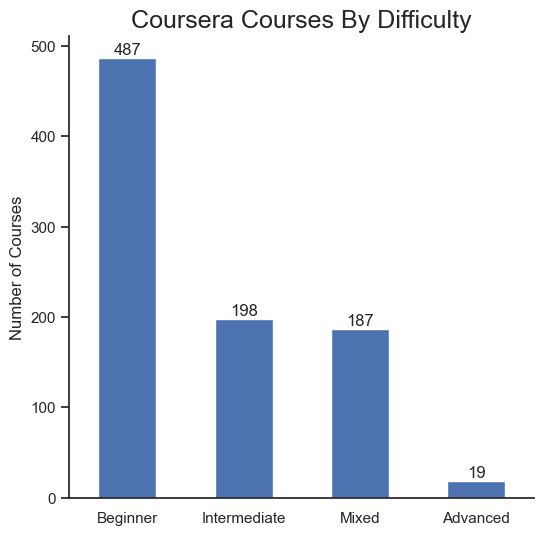

In [75]:
fig = plt.figure(figsize=(6, 6))  # define plot area
ax = fig.gca()  # define axis
# Use the plot.bar method on the counts data frame
counts_by_difficulty.plot.bar(ax=ax)
ax.set_title('Coursera Courses By Difficulty')  # Give the plot a main title
ax.set_ylabel('Number of Courses')  # Set text for y axis
ax.set_xlabel(None)  # Remove x axis label
ax.bar_label(ax.containers[0])  # place values directly on bar chart
plt.xticks(rotation=0)  # make x-axis values flat
plt.tick_params(bottom=False)  # remove tick marks

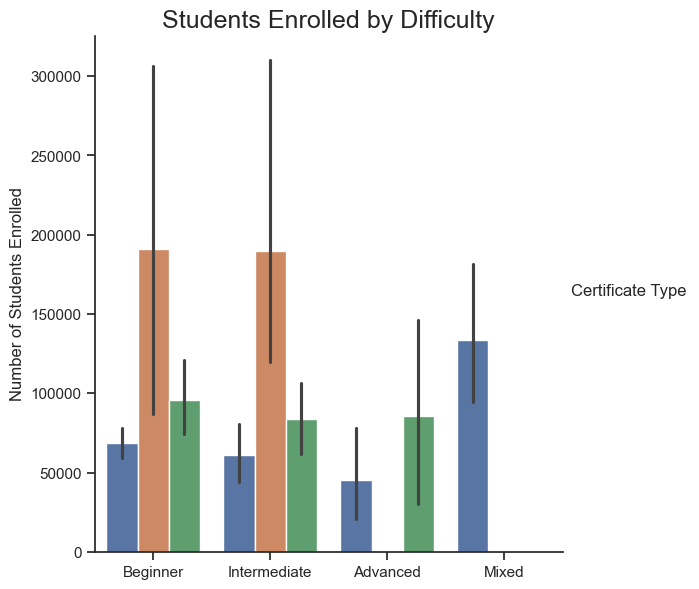

In [76]:
# as a first pass, I created a bar chart of students_enrolled per course difficulty
# and while this is useful, I really want to know where customers are truly enrolling
# based on difficulty and certificate type
diff_order = ["Beginner", "Intermediate", "Advanced", "Mixed"]
g = sns.catplot(data=coursera_data, x="difficulty", y="students_enrolled", ax=ax, 
                errorbar="ci", hue="certificate_type",
                kind="bar", order=diff_order, height=6, aspect=1, legend=False)
g.set_axis_labels("", "Number of Students Enrolled")
ax = g.ax
fig = g.figure
ax.set_title("Students Enrolled by Difficulty")
# added legend post-fact so that I could control the names
g.add_legend(title="Certificate Type");

note: errorbars represent 95% confidence intervals i.e. the 95% percentile of the bootstrap distribution

In [77]:
# so now, instead of looking at averages, I will look at total enrollment per difficulty and course type
# to do so using Pandas DataFrame.plot.bar method I need wide-form data of counts

total_students_enrolled_by_certanddiff = coursera_data.groupby(
    by=["certificate_type", "difficulty"], observed=True)['students_enrolled'].sum()
total_students = total_students_enrolled_by_certanddiff.unstack(level=0)
total_students.index.name = None
total_students["difficulty"] = total_students.index
total_students

certificate_type,course,professional certificate,specialization,difficulty
Advanced,406700.0,NaN,857700.0,Advanced
Beginner,19411500.0,1718400.0,18791900.0,Beginner
Intermediate,6323700.0,570000.0,7612600.0,Intermediate
Mixed,24989400.0,NaN,NaN,Mixed


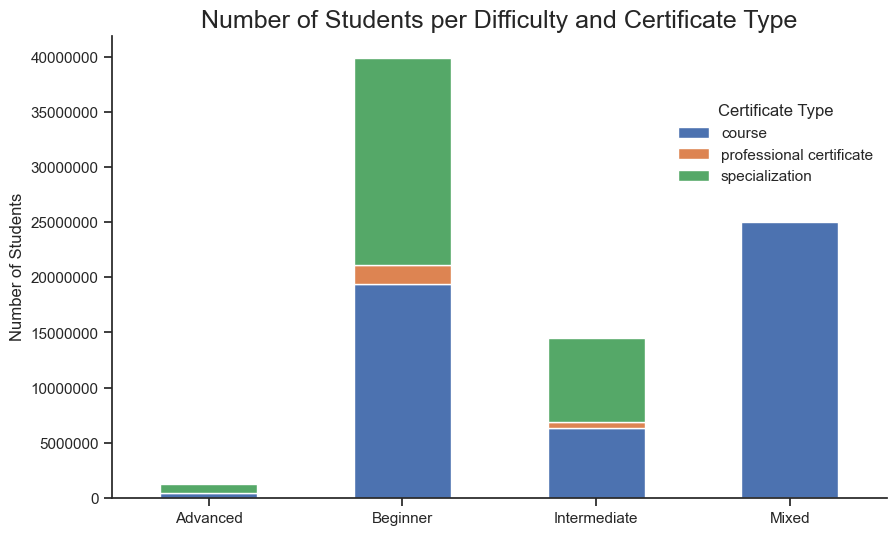

In [78]:
# Create a stacked bar plot using the DataFrame.plot.bar Pandas method

ax = total_students.plot.bar(
    x='difficulty', stacked=True, figsize=(10, 6), legend=False)
ax.set_title(
    'Number of Students per Difficulty and Certificate Type', fontsize=18)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.set_ylabel("Number of Students")
ax.set_xlabel(None)
plt.figlegend(title="Certificate Type", loc='right',
              bbox_to_anchor=(0.4, 0.45, 0.5, 0.5), frameon=False)
plt.xticks(rotation=0);  # make x-axis values flat

Now we can clearly see that majorities of students are in fact signed up for beginner courses across all the different types.

One question however is how do students rate those courses? 

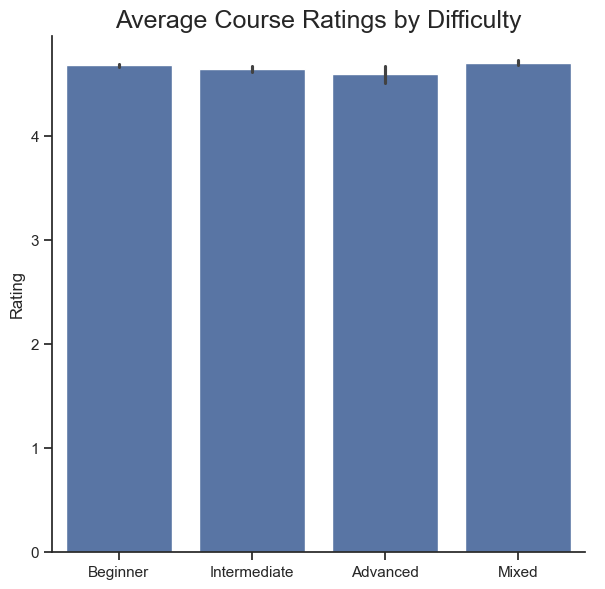

In [79]:
g = sns.catplot(data=coursera_data, x="difficulty", y="rating", kind="bar",
                errorbar="ci", order=diff_order, height=6, aspect=1)
g.set_axis_labels("", "Rating")
ax = g.ax
ax.set_title("Average Course Ratings by Difficulty");

At first glance, it seems like all of these difficulties are rated quite similarly, but the confidence interval does vary more for the advanced level, so how are these ratings actually distributed?

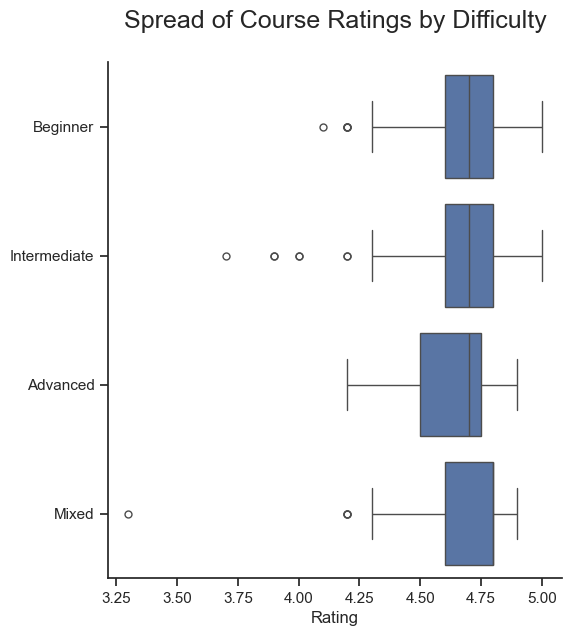

In [80]:
g = sns.catplot(data=coursera_data, x="rating", y="difficulty", kind="box", order=diff_order, height=6, aspect=1)
g.set_axis_labels("Rating", "")
ax=g.ax
ax.set_title("Spread of Course Ratings by Difficulty", y=1.05);

it seems like there is one particular course in the "Mixed" difficulty category that is the most disliked, what could that course be?

In [81]:
coursera_data[coursera_data['rating']< 3.5]

,title,organization,certificate_type,rating,difficulty,students_enrolled
767,How To Create a Website in a Weekend! (Project...,The State University of New York,course,3.3,Mixed,140000.0


It also seems like there are not too many courses that get low ratings across all the different difficulties, let's look deeper into those courses

In [82]:
coursera_data[coursera_data['rating']< 4.3]

,title,organization,certificate_type,rating,difficulty,students_enrolled
178,Machine Learning for Trading,Google Cloud,specialization,3.9,Intermediate,15000.0
339,Introduction to Spreadsheets and Models,University of Pennsylvania,course,4.2,Mixed,76000.0
345,Instructional Design Foundations and Applications,University of Illinois at Urbana-Champaign,course,4.2,Mixed,12000.0
352,Machine Learning and Reinforcement Learning in...,New York University,specialization,3.7,Intermediate,29000.0
472,Optical Engineering,University of Colorado Boulder,specialization,4.2,Advanced,6200.0
550,Mastering Data Analysis in Excel,Duke University,course,4.2,Mixed,280000.0
569,Foundations of Marketing Analytics,Emory University,specialization,4.2,Intermediate,27000.0
609,How to Start Your Own Business,Michigan State University,specialization,4.1,Beginner,34000.0
618,Unity XR: How to Build AR and VR Apps,Unity,specialization,4.2,Beginner,12000.0
659,"Introduction to Trading, Machine Learning & GCP",New York Institute of Finance,course,4.0,Intermediate,13000.0


__These outliers might be courses to investigate to see what users do not like on the Coursera platform to better understand what Coursera users do not like__

To further our investigation, I am a bit curious about the distribution of different certificate types on Coursera. 

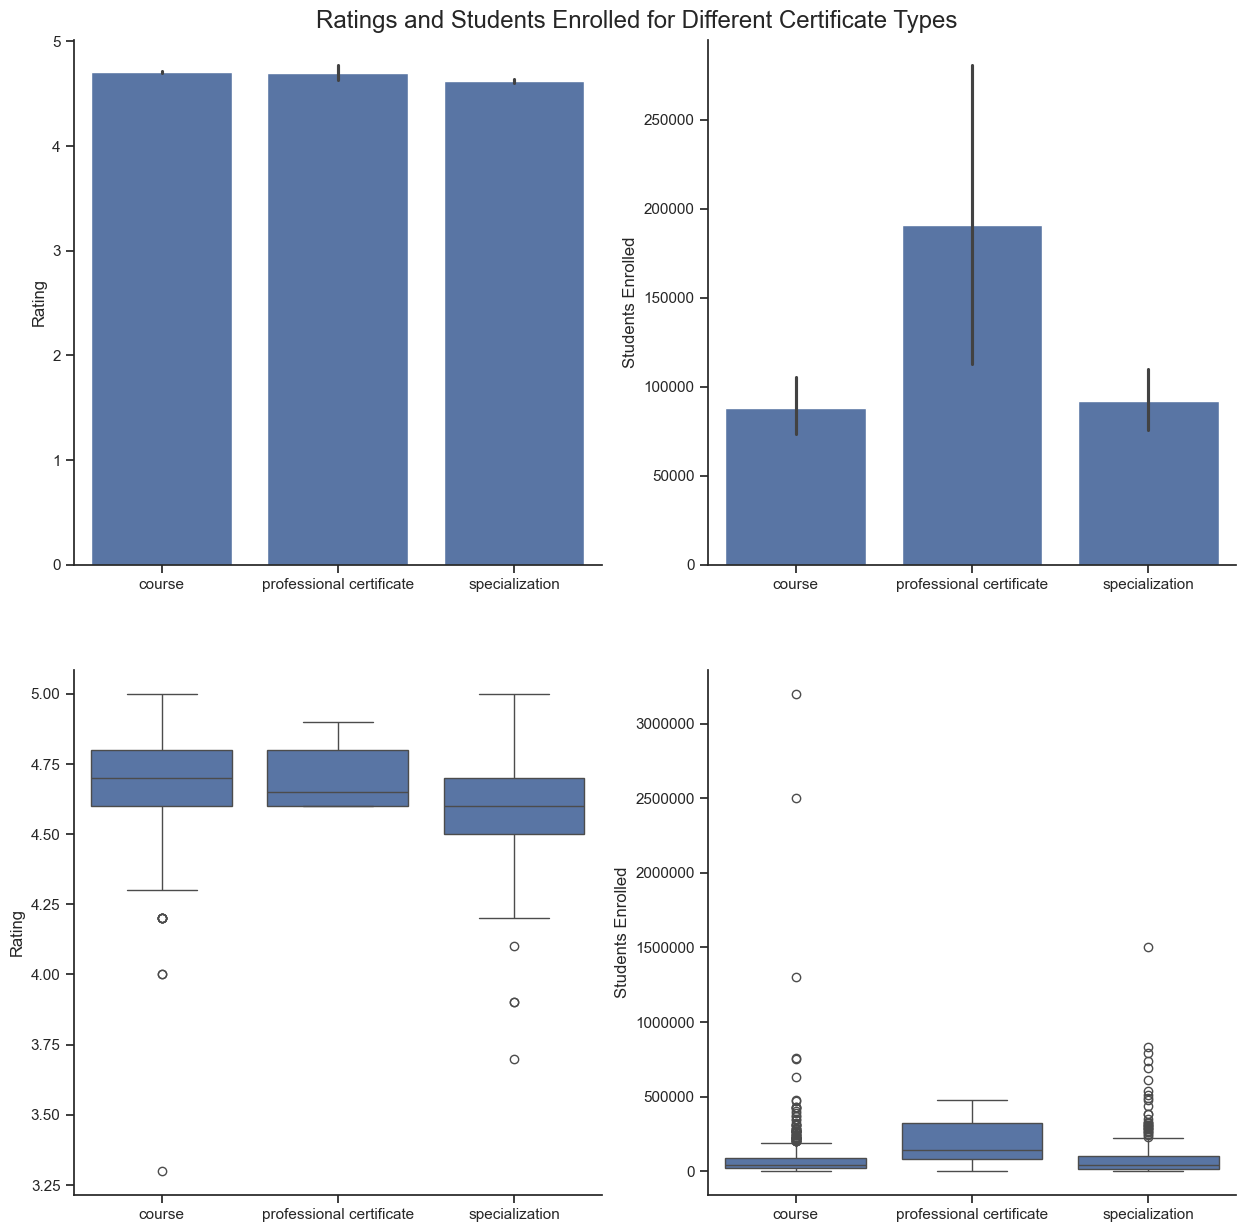

In [83]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle("Ratings and Students Enrolled for Different Certificate Types",
             y=.9, fontsize='x-large')
sns.barplot(ax=axes[0, 0], data=coursera_data,
            x="certificate_type", y="rating")
sns.barplot(ax=axes[0, 1], data=coursera_data,
            x="certificate_type", y="students_enrolled")
sns.boxplot(ax=axes[1, 0], data=coursera_data,
            x="certificate_type", y="rating")
sns.boxplot(ax=axes[1, 1], data=coursera_data,
            x="certificate_type", y="students_enrolled")

axes[0, 0].set(xlabel="", ylabel="Rating")
axes[0, 1].set(xlabel="", ylabel="Students Enrolled")
axes[1, 0].set(xlabel="", ylabel="Rating")
axes[1, 1].set(xlabel="", ylabel="Students Enrolled")
plt.ticklabel_format(style='plain', axis='y')

In [84]:
# What are the distributions of different certificate types offered on Coursera?

coursera_data['certificate_type'].value_counts()

certificate_type
course                      582
specialization              297
professional certificate     12
Name: count, dtype: int64

In [85]:
# get those groups in different dataframes for later use

courses = coursera_data[coursera_data['certificate_type'].str.contains(
    'course')]
courses

,title,organization,certificate_type,rating,difficulty,students_enrolled
2,The Science of Well-Being,Yale University,course,4.9,Mixed,2500000.0
6,Machine Learning - course,Stanford University,course,4.9,Mixed,3200000.0
14,Financial Markets,Yale University,course,4.8,Beginner,470000.0
21,COVID-19 Contact Tracing,Johns Hopkins University,course,4.9,Beginner,220000.0
29,Introduction to Psychology,Yale University,course,4.9,Beginner,270000.0
...,...,...,...,...,...,...
883,Психолингвистика (Psycholinguistics),Saint Petersburg State University,course,4.8,Mixed,21000.0
884,Building Resilient Streaming Analytics Systems...,Google Cloud,course,4.6,Intermediate,5800.0
887,Object-Oriented Design,University of Alberta,course,4.7,Intermediate,33000.0
889,Погружение в Python,Moscow Institute of Physics and Technology,course,4.7,Intermediate,45000.0


In [86]:
specializations = coursera_data[coursera_data['certificate_type'].str.contains(
    'specialization')]
specializations

,title,organization,certificate_type,rating,difficulty,students_enrolled
1,Introduction to Data Science,IBM,specialization,4.6,Beginner,310000.0
3,Python for Everybody,University of Michigan,specialization,4.8,Beginner,1500000.0
5,Deep Learning,deeplearning.ai,specialization,4.8,Intermediate,690000.0
7,Business Foundations,University of Pennsylvania,specialization,4.7,Beginner,510000.0
8,Applied Data Science,IBM,specialization,4.6,Beginner,220000.0
...,...,...,...,...,...,...
875,Русский как иностранный,Saint Petersburg State University,specialization,4.6,Intermediate,9800.0
881,Evaluación educativa,Universidad Nacional Autónoma de México,specialization,4.8,Beginner,13000.0
885,Autodesk CAD/CAM for Manufacturing,Autodesk,specialization,4.8,Intermediate,7300.0
886,Understanding Modern Finance,American Institute of Business and Economics,specialization,4.4,Intermediate,11000.0


In [87]:
professional_certificates = coursera_data[coursera_data['certificate_type'].str.contains(
    'professional certificate')]
professional_certificates

,title,organization,certificate_type,rating,difficulty,students_enrolled
0,IBM Data Science,IBM,professional certificate,4.6,Beginner,480000.0
4,Google IT Support,Google,professional certificate,4.8,Beginner,350000.0
9,Cloud Engineering with Google Cloud,Google Cloud,professional certificate,4.7,Intermediate,310000.0
12,IBM Applied AI,IBM,professional certificate,4.6,Beginner,220000.0
22,Data Engineering with Google Cloud,Google Cloud,professional certificate,4.6,Intermediate,120000.0
25,Google IT Automation with Python,Google,professional certificate,4.7,Beginner,93000.0
34,IBM AI Engineering,IBM,professional certificate,4.6,Intermediate,140000.0
56,Arizona State University TESOL,Arizona State University,professional certificate,4.9,Beginner,150000.0
153,UCI Project Management,"University of California, Irvine",professional certificate,4.6,Beginner,44000.0
160,SAS Programmer,SAS,professional certificate,4.8,Beginner,370000.0


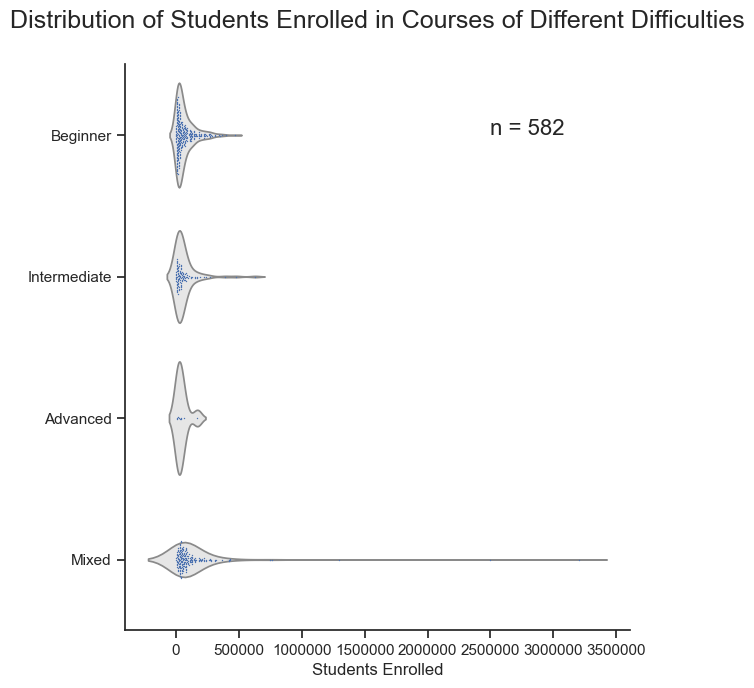

In [88]:
# What can we say about the distributions of each of these courses along different difficulties?

g = sns.catplot(data=courses, x="students_enrolled", y="difficulty",
                kind="violin", color=".9", inner=None, order=diff_order, height=6.5, aspect=1)
sns.swarmplot(data=courses, x="students_enrolled",
              y="difficulty", size=1, order=diff_order)
g.set_axis_labels("Students Enrolled", "")

ax = g.ax
ax.set_title(
    "Distribution of Students Enrolled in Courses of Different Difficulties", y=1.05)
ax.text(2500000, "Beginner", "n = 582", fontsize=16)

plt.ticklabel_format(style='plain', axis='x')

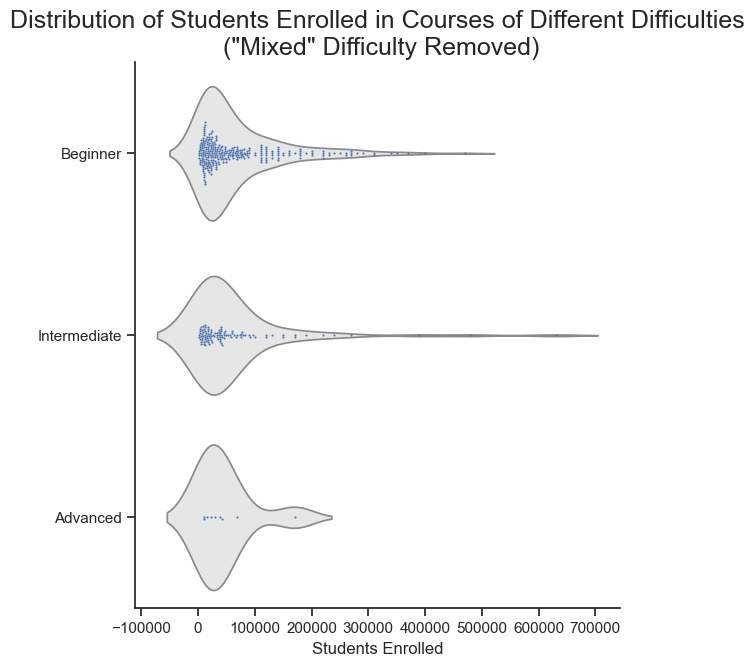

In [89]:
# Removing the Mixed column to see the similar distributions more clearly

g = sns.catplot(data=courses, x="students_enrolled", y="difficulty",
                kind="violin", color=".9", inner=None, order=["Beginner", "Intermediate", "Advanced"], 
                height=6.3, aspect=1)
sns.swarmplot(data=courses, x="students_enrolled",
              y="difficulty", size=1.5, order=["Beginner", "Intermediate", "Advanced"])
g.set_axis_labels("Students Enrolled", "")

ax = g.ax
ax.set_title(
    'Distribution of Students Enrolled in Courses of Different Difficulties\n ("Mixed" Difficulty Removed)')

plt.ticklabel_format(style='plain', axis='x')

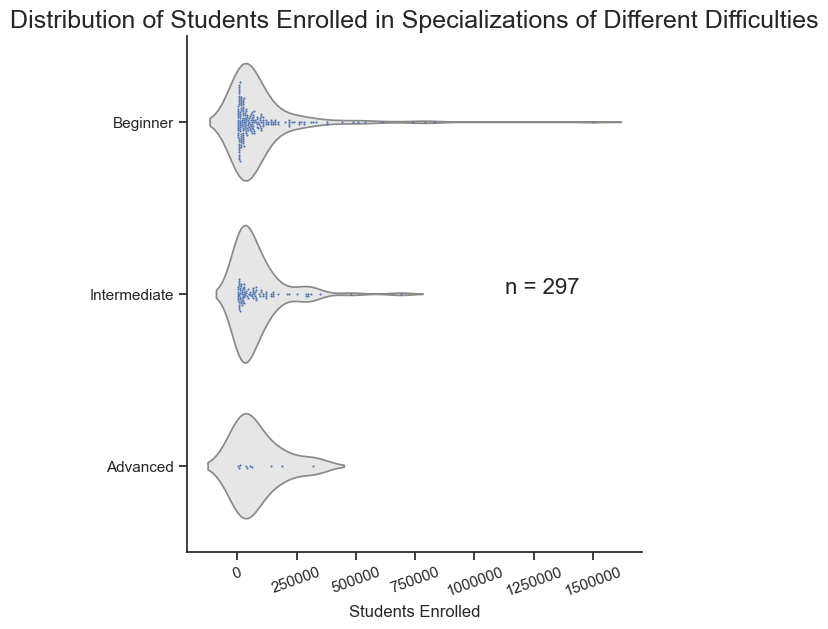

In [90]:
# Now looking at the 297 specializations
# note: did not include any empty categories (e.g. Mixed)

g = sns.catplot(data=specializations, x="students_enrolled",
                y="difficulty", kind="violin", color=".9", inner=None,
                order=["Beginner", "Intermediate", "Advanced"],
                height=6, aspect=1)
sns.swarmplot(data=specializations, x="students_enrolled",
              y="difficulty", size=1.5, order=["Beginner", "Intermediate", "Advanced"])

g.set_axis_labels("Students Enrolled", "")

ax = g.ax
ax.set_title(
    "Distribution of Students Enrolled in Specializations of Different Difficulties")
ax.text(0.7, 0.5, "n = 297", transform=ax.transAxes, fontsize=16)


plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=20);  # tilt x values for legibility

__What course(s) of mixed difficulty are students enrolling in such great numbers?__<br>
This is an extremely popular course<br>
So I will look at all of those courses that are far beyond typical distributions

In [91]:
coursera_data[coursera_data['students_enrolled'] > 1000000]

,title,organization,certificate_type,rating,difficulty,students_enrolled
2,The Science of Well-Being,Yale University,course,4.9,Mixed,2500000.0
3,Python for Everybody,University of Michigan,specialization,4.8,Beginner,1500000.0
6,Machine Learning - course,Stanford University,course,4.9,Mixed,3200000.0
47,Programming for Everybody (Getting Started wit...,University of Michigan,course,4.8,Mixed,1300000.0


__These outliers could be used as case studies to investigate what Coursera students find particularly engaging__

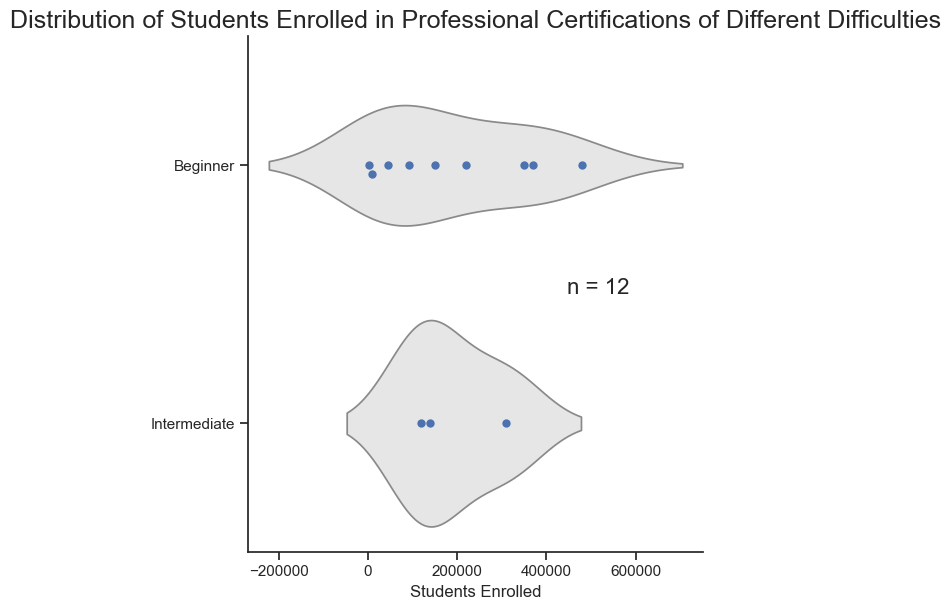

In [92]:
g = sns.catplot(data=professional_certificates, x="students_enrolled", y="difficulty",
                kind="violin", color=".9", inner=None, order=["Beginner", "Intermediate"],
                height=6, aspect=1)
sns.swarmplot(data=professional_certificates, x="students_enrolled",
              y="difficulty", size=6, order=["Beginner", "Intermediate"])

g.set_axis_labels("Students Enrolled", "")

ax = g.ax
ax.set_title(
    "Distribution of Students Enrolled in Professional Certifications of Different Difficulties")
ax.text(0.7, 0.5, "n = 12", transform=ax.transAxes, fontsize=16)


plt.ticklabel_format(style='plain', axis='x')

There are not many professional certifications, so these are not particularly meaningful distributions. Hence, it would be more useful to look at the median and quantiles of our data using a boxplot. This data is seen above, but let's isolate it here.  

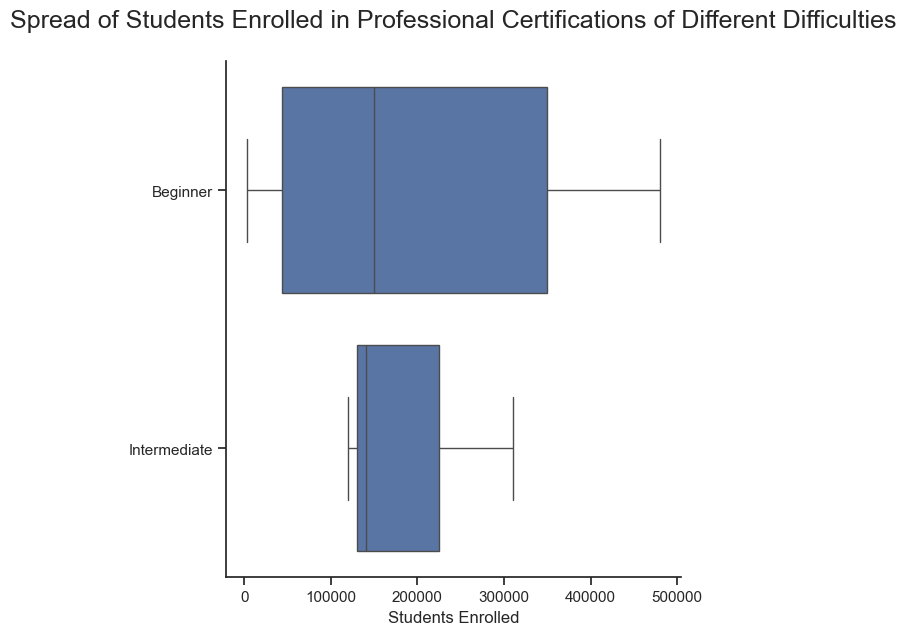

In [93]:
g = sns.catplot(data=professional_certificates, x="students_enrolled",
                y="difficulty", kind="box", order=["Beginner", "Intermediate"], height=6, aspect=1)
g.set_axis_labels("Students Enrolled", "")

ax = g.ax
ax.set_title(
    "Spread of Students Enrolled in Professional Certifications of Different Difficulties", y=1.05)

plt.ticklabel_format(style='plain', axis='x')

and while we're looking at the data in this way, let's step out in scope one more time and look at the spread of all of the data by difficulty 

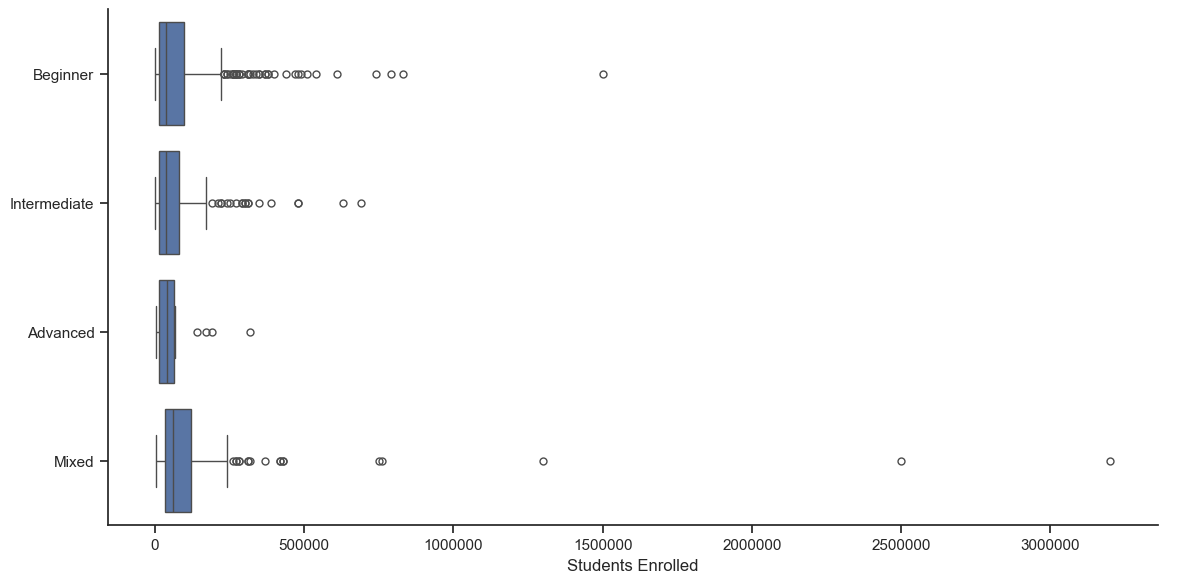

In [94]:
g = sns.catplot(data=coursera_data, x="students_enrolled", y="difficulty",
                order=diff_order, kind="box", height=6, aspect=2)
g.set_axis_labels("Students Enrolled", "")

plt.ticklabel_format(style='plain', axis='x')

So far, what we see is the following:
- Major outliers in students enrolled are mixed level and beginner courses in programming
    - all of these outliers come from universities in the USA 
    - one of these outliers is a course in the science of well being 
- University of Michigan has two particularly popular courses
- Any course with > 100,000 is beyond the typical distribution
- Below 100,000, Coursera options appear to be approximately normally distributed 
- Beginner specializations have more Coursera options that have positive outliers. 
- There are few professional certifications, but median enrollment is above 100,000 students

Given this information, let's see how students are rating these courses once again, but in a slightly different representation. 

In [95]:
coursera_rating_by_certificate_difficulty = coursera_data.pivot_table(
    values="rating", index="certificate_type", columns="difficulty")

In [96]:
coursera_rating_by_certificate_difficulty

difficulty,Advanced,Beginner,Intermediate,Mixed
certificate_type,,,,
course,4.70,4.714184,4.685577,4.708556
professional certificate,NaN,4.722222,4.633333,NaN
specialization,4.51,4.631122,4.602198,NaN


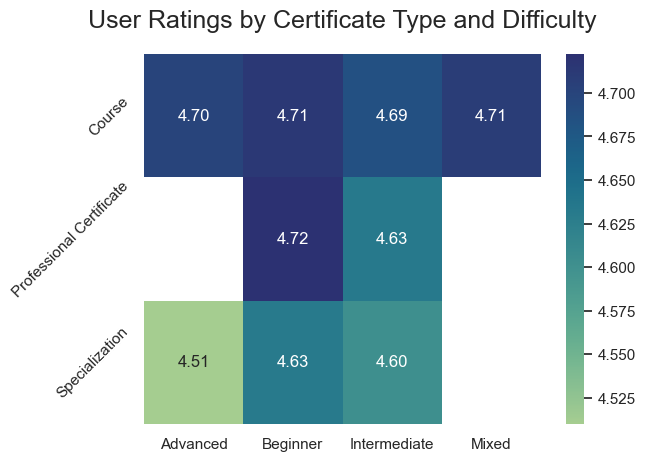

In [98]:
sns.set_style("white")
ax = sns.heatmap(coursera_rating_by_certificate_difficulty,
                 cmap="crest", annot=True, fmt='.2f')
ax.set_title("User Ratings by Certificate Type and Difficulty", y=1.05)
ax.set(xlabel="", ylabel="")

plt.yticks([0.5, 1.5, 2.5], ["Course", "Professional Certificate",
           "Specialization"], rotation=45)
plt.show()

This further shows us that Beginner level content is preferable and that courses and professional certificates are preferred to specializations

but this now begs the question:<br>
__is there a relationship between the number of students enrolled and their rating?__

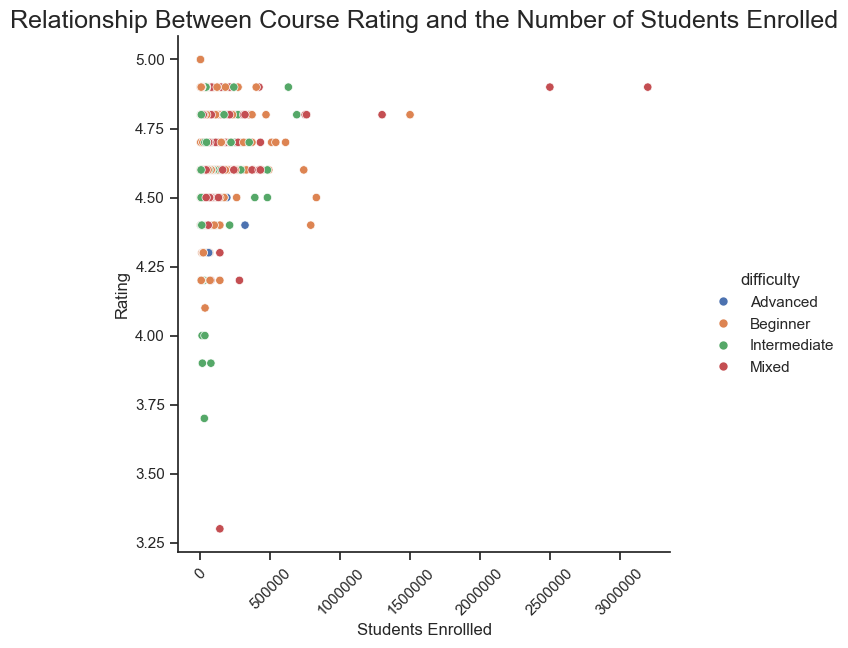

In [99]:
# is there a relationship between the students enrolled and their rating?
sns.set_style("ticks")

g = sns.relplot(data=coursera_data, x="students_enrolled",
                y="rating", hue="difficulty", height=6, aspect=1)
ax = g.ax
ax.set(title="Relationship Between Course Rating and the Number of Students Enrolled",
       xlabel="Students Enrollled", ylabel="Rating")

plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45);

one thing that catches my attention here are the outliers when it comes to the number of students enrolled. Although we previously assessed this, we can look deeper into this. 

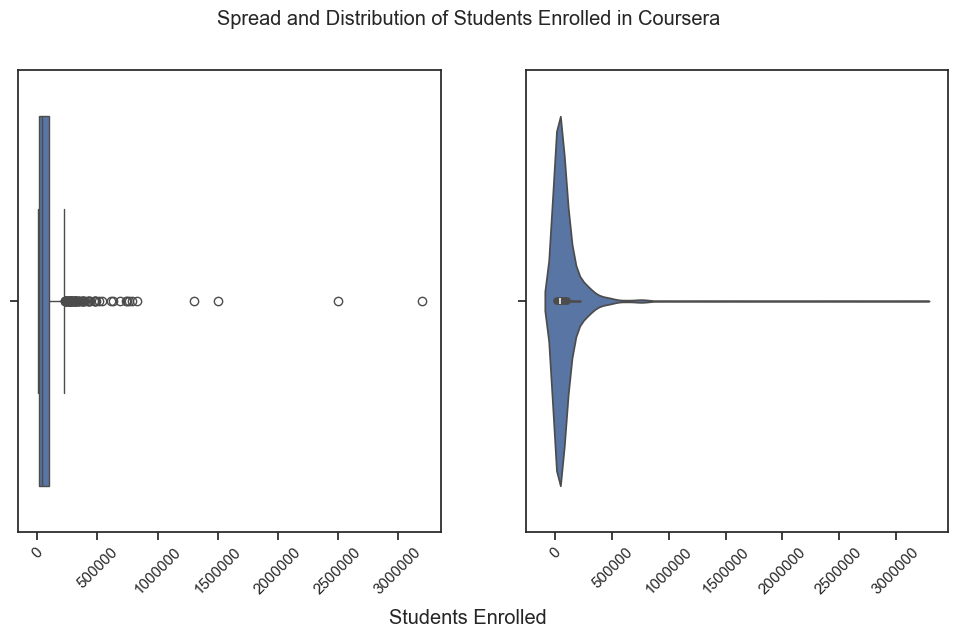

In [100]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
fig.suptitle("Spread and Distribution of Students Enrolled in Coursera")
fig.supxlabel("Students Enrolled", y=-0.05)

sns.boxplot(ax=axes[0], data=coursera_data, x="students_enrolled")

sns.violinplot(ax= axes[1], data=coursera_data, x="students_enrolled")

axes[0].set_xlabel("")
axes[0].tick_params(axis='x', labelrotation=45)


axes[1].set_xlabel("")
axes[1].tick_params(axis='x', labelrotation=45)
axes[0].ticklabel_format(style='plain', axis='x')
axes[1].ticklabel_format(style='plain', axis='x')

As we can see, outliers really contribute to this dataset, and while I believe these are instructive examples to assess the preferences of Coursera Users, I am curious what trends are in the typical distribution of the data, closer to the median. 

In [101]:
# set a 3 standard deviation cutoff threshold to define "outliers"

upper_limit = coursera_data['students_enrolled'].mean(
) + 3 * coursera_data['students_enrolled'].std()  # Right from the mean
lower_limit = coursera_data['students_enrolled'].mean(
) - 3 * coursera_data['students_enrolled'].std()  # Left from the mean
print(upper_limit)
print(lower_limit)

636361.4378733014
-455257.2852358155


In [102]:
# see the outliers
# note: only positive outliers are meaningful in this dataset.


coursera_outliers = coursera_data.loc[coursera_data['students_enrolled'] >= upper_limit]
coursera_outliers

,title,organization,certificate_type,rating,difficulty,students_enrolled
2,The Science of Well-Being,Yale University,course,4.9,Mixed,2500000.0
3,Python for Everybody,University of Michigan,specialization,4.8,Beginner,1500000.0
5,Deep Learning,deeplearning.ai,specialization,4.8,Intermediate,690000.0
6,Machine Learning - course,Stanford University,course,4.9,Mixed,3200000.0
13,Data Science,Johns Hopkins University,specialization,4.5,Beginner,830000.0
15,Data Science: Foundations using R,Johns Hopkins University,specialization,4.6,Beginner,740000.0
40,Successful Negotiation: Essential Strategies a...,University of Michigan,course,4.8,Mixed,750000.0
44,Career Success,"University of California, Irvine",specialization,4.4,Beginner,790000.0
47,Programming for Everybody (Getting Started wit...,University of Michigan,course,4.8,Mixed,1300000.0
175,English for Career Development,University of Pennsylvania,course,4.8,Mixed,760000.0


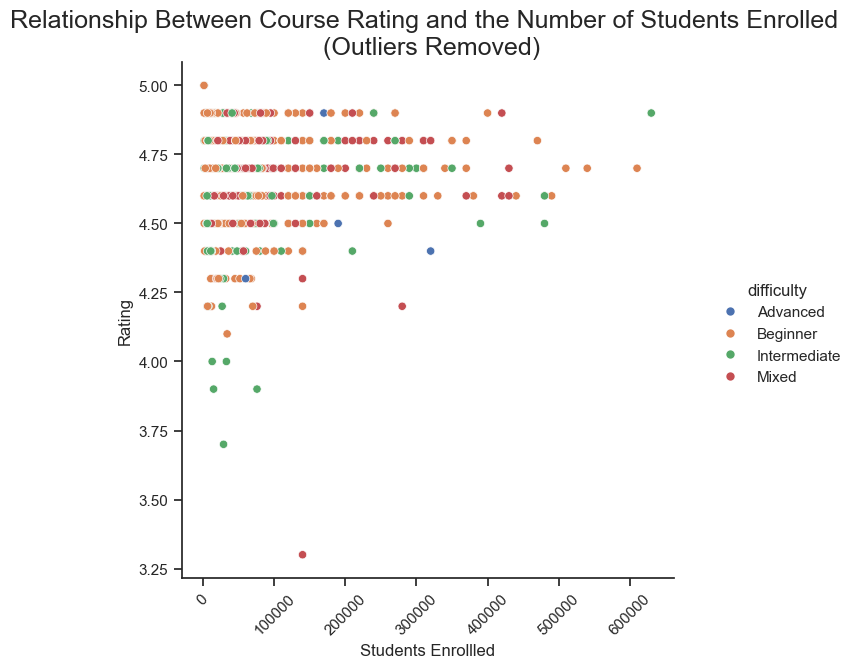

In [103]:
# look at this relationship without the outliers

g = sns.relplot(data=coursera_data.loc[coursera_data['students_enrolled']
                                       < upper_limit], x="students_enrolled", y="rating",
                hue="difficulty", height=6, aspect=1)


ax = g.ax
ax.set(title="Relationship Between Course Rating and the Number of Students Enrolled \n (Outliers Removed)",
       xlabel="Students Enrollled", ylabel="Rating")

plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45);

In the absence of outliers, it does appear that there might be some relationship, at least the minimum rating tends to increase. That same trend is seen with the outliers, but at least here is appears to be more linear (potentially). 

As a last thing to look at I would view some of the specific organizations and titles on the Coursera site. 

In [104]:
# How many organizations host their content on Coursera?

n_courses = coursera_data['title'].nunique()
n_organizations = coursera_data['organization'].nunique()
print(f"There are {n_courses} courses on the Coursera platform from {n_organizations} organizations.")
coursera_data['organization'].value_counts()

There are 891 courses on the Coursera platform from 154 organizations.


organization
University of Pennsylvania    59
University of Michigan        41
Google Cloud                  34
Johns Hopkins University      28
Duke University               28
                              ..
University of Lausanne         1
University of New Mexico       1
VMware                         1
École Polytechnique            1
École des Ponts ParisTech      1
Name: count, Length: 154, dtype: int64

I would like to assess the top 10 most popular and least popular programs in terms of enrollment and look at some of the organizations that include their content on Coursera. 

In [105]:
# top 10 most popular programs
top_courses = coursera_data.sort_values(by=["students_enrolled"], ascending=False)
top_courses.set_index("title", inplace=True)
top_courses.head(10)

,organization,certificate_type,rating,difficulty,students_enrolled
title,,,,,
Machine Learning - course,Stanford University,course,4.9,Mixed,3200000.0
The Science of Well-Being,Yale University,course,4.9,Mixed,2500000.0
Python for Everybody,University of Michigan,specialization,4.8,Beginner,1500000.0
Programming for Everybody (Getting Started with Python),University of Michigan,course,4.8,Mixed,1300000.0
Data Science,Johns Hopkins University,specialization,4.5,Beginner,830000.0
Career Success,"University of California, Irvine",specialization,4.4,Beginner,790000.0
English for Career Development,University of Pennsylvania,course,4.8,Mixed,760000.0
Successful Negotiation: Essential Strategies and Skills,University of Michigan,course,4.8,Mixed,750000.0
Data Science: Foundations using R,Johns Hopkins University,specialization,4.6,Beginner,740000.0


In [106]:
# top 10 least popular porgrams
bottom_courses = coursera_data.sort_values(by=["students_enrolled"])
bottom_courses.set_index("title", inplace=True)
bottom_courses.head(10)

,organization,certificate_type,rating,difficulty,students_enrolled
title,,,,,
El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho,Universidad Austral,course,5.0,Beginner,1500.0
Infectious Disease Modelling,Imperial College London,specialization,5.0,Intermediate,1600.0
Blockchain Revolution in Financial Services,INSEAD,specialization,4.6,Beginner,1600.0
Healthcare Law,University of Pennsylvania,specialization,4.7,Intermediate,1700.0
"Identifying, Monitoring, and Analyzing Risk and Incident Response and Recovery",(ISC)²,course,4.9,Beginner,1700.0
The Pronunciation of American English,"University of California, Irvine",specialization,4.6,Beginner,1700.0
Esports,"University of California, Irvine",specialization,4.5,Beginner,1800.0
Blended Language Learning: Design and Practice for Teachers,University of Colorado Boulder,course,4.8,Intermediate,1900.0
Implementing RPA with Cognitive Automation and Analytics,Automation Anywhere,specialization,4.6,Beginner,2200.0


In [107]:
mean_rating = coursera_data["rating"].mean()

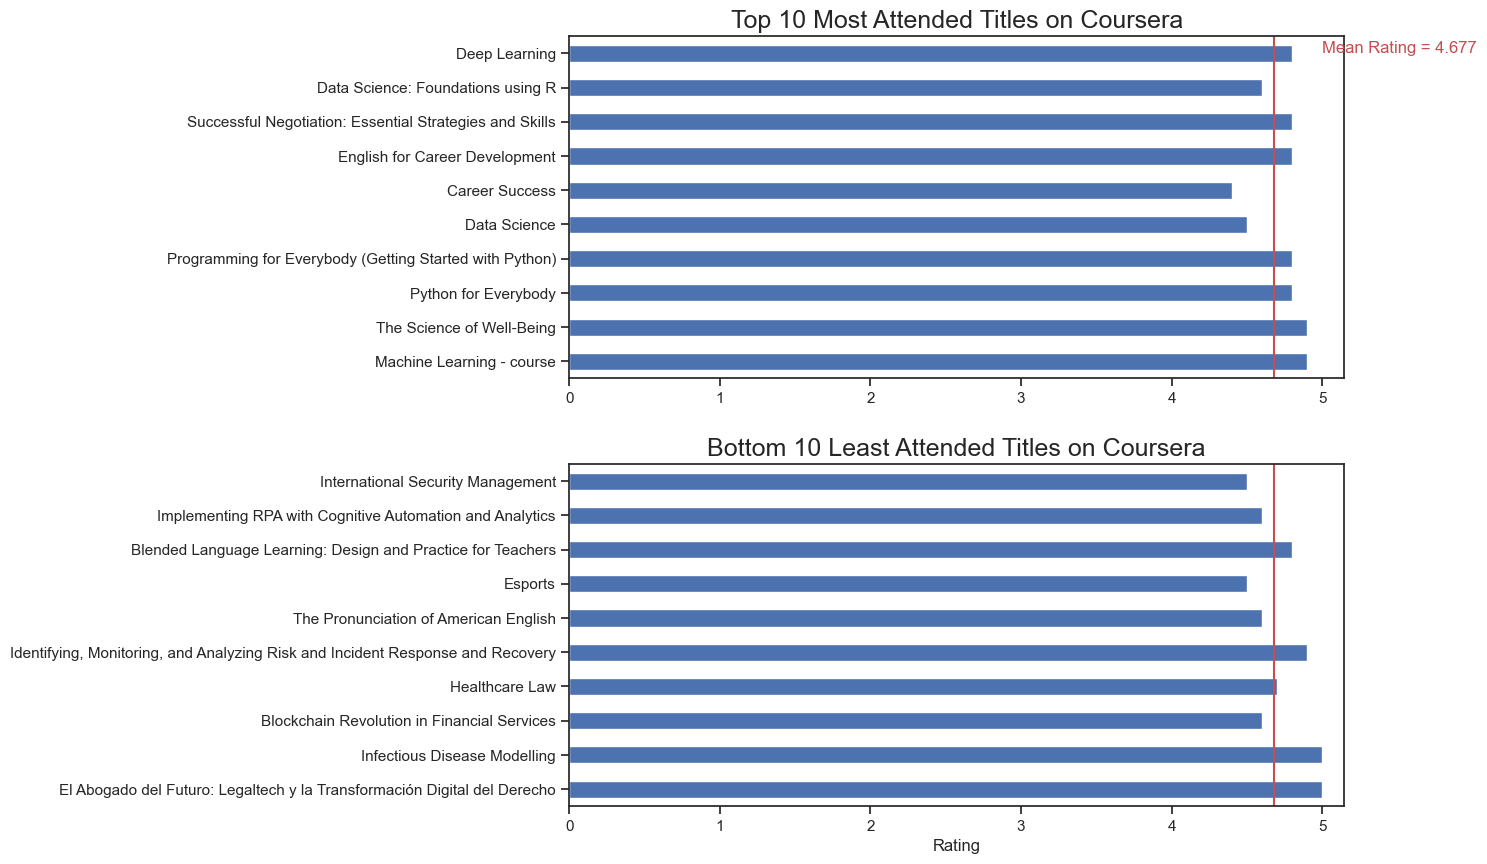

In [108]:
fig, axs = plt.subplots(2,1, figsize=(10,10))

top10=top_courses.iloc[0:10]
top10["rating"].plot(kind="barh", ax=axs[0])
axs[0].set_title("Top 10 Most Attended Titles on Coursera")
axs[0].set_ylabel(None)
axs[0].axvline(x = mean_rating, color = 'r', linestyle = '-') 
axs[0].text(5, 9, f"Mean Rating = {mean_rating:.3f}", color='r');

bottom10=bottom_courses.iloc[0:10]
bottom10["rating"].plot(kind="barh", ax=axs[1])
axs[1].set_title("Bottom 10 Least Attended Titles on Coursera")
axs[1].sharex(axs[0])
axs[1].set_xlabel("Rating")
axs[1].set_ylabel(None)
axs[1].axvline(x = mean_rating, color = 'r', linestyle = '-') 
plt.subplots_adjust(hspace=0.25)

While the scatterplots are more informative about the Coursera data on the whole, I chose to plot these extremes of the distribution to 
1. look at the titles of these most and least preferred courses 
2. to see if there are any obvious visible trends at the extremes that are observable by the human eye when considering the ratings of courses. 

***
# Conclusions and Further Directions

Our working hypotheses for this project that Coursera Users are using the platform for continuing education was mostly found to be supported. For instance, much of the popular and highly-rated content is from top Universities in the USA. However, further research will be necessary to assess the strength of this finding. For instance, we assumed that __more students are likely enroll in beginner courses on average and that advanced courses will be highly rated.__ In general, this finding was supported, beginner and mixed-level content dominate the charts when it comes to what Coursera users enrollment. However, ratings were generally similar for all difficulty levels. Negative outlier ratings decreased for more advanced courses, which does suggest that on average the advanced courses might be preferred, but this relationship is unclear and would require more deep analysis. Both STEM and non-STEM titles appear to be in the most-liked and disliked titles. 

Future directions would be to take a more rigorous approach to statistical analysis and to perform modeling of the data to go beyond basic exploratory analysis. To further assess assess STEM vs. non-STEM titles, analysis can be formed to sort data based on some regular expression or other linguistic feature prior to analyses. 